In [31]:
import numpy as np
import pandas as pd
from pylab import *
from sklearn import svm

In [49]:
dataset = pd.read_excel('./BreastTissue.xls','Data')
dataset.describe()

,Case #,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,53.500000,784.251618,0.120133,0.114691,190.568642,7335.155162,23.473784,75.381258,166.710575,810.638127
std,30.743563,753.950075,0.068596,0.101347,190.801448,18580.314213,23.354672,81.345838,181.309580,763.019135
min,1.000000,103.000000,0.012392,-0.066323,19.647670,70.426239,1.595742,7.968783,-9.257696,124.978561
25%,27.250000,250.000000,0.067413,0.043982,53.845470,409.647141,8.180321,26.893773,41.781258,270.215238
50%,53.500000,384.936489,0.105418,0.086568,120.777303,2219.581163,16.133657,44.216040,97.832557,454.108153
75%,79.750000,1487.989626,0.169602,0.166504,255.334809,7615.204968,30.953294,83.671755,232.990070,1301.559438
max,106.000000,2800.000000,0.358316,0.467748,1063.441427,174480.476218,164.071543,436.099640,977.552367,2896.582483


In [50]:
dataset.drop(dataset.columns[0],inplace=True,axis=1)
dataset.head()

,Class,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
0,car,524.794072,0.187448,0.032114,228.800228,6843.598481,29.910803,60.204880,220.737212,556.828334
1,car,330.000000,0.226893,0.265290,121.154201,3163.239472,26.109202,69.717361,99.084964,400.225776
2,car,551.879287,0.232478,0.063530,264.804935,11888.391827,44.894903,77.793297,253.785300,656.769449
3,car,380.000000,0.240855,0.286234,137.640111,5402.171180,39.248524,88.758446,105.198568,493.701814
4,car,362.831266,0.200713,0.244346,124.912559,3290.462446,26.342127,69.389389,103.866552,424.796503


In [51]:
dataset_columns = dataset.columns
print(list(dataset_columns))

['Class', 'I0', 'PA500', 'HFS', 'DA', 'Area', 'A/DA', 'Max IP', 'DR', 'P']


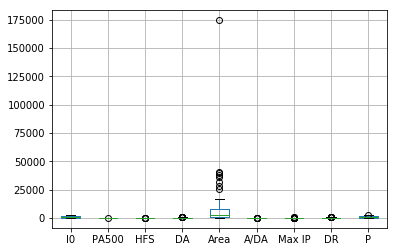

In [52]:
fig = dataset.boxplot()
# fig.figure

In [53]:
print (dataset.columns.values[1:])
for name in dataset.columns.values[1:]:
    Q1 = dataset[name].quantile(0.25)
    Q3 = dataset[name].quantile(0.75)
    IQR = Q3 - Q1
    mask = (dataset[name] < (Q1 - 1.5 * IQR)) | (dataset[name] > (Q3 + 1.5 * IQR))
    dataset.loc[mask,[name]] = np.nan

['I0' 'PA500' 'HFS' 'DA' 'Area' 'A/DA' 'Max IP' 'DR' 'P']


In [54]:
dataset.describe()

,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
count,106.000000,105.000000,102.000000,99.000000,98.000000,101.000000,95.000000,99.000000,105.000000
mean,784.251618,0.117864,0.103145,155.127909,3724.337564,19.786807,52.331548,131.803170,790.771991
std,753.950075,0.064807,0.083831,133.964402,4359.496549,14.846681,36.319006,122.952680,738.620125
min,103.000000,0.012392,-0.066323,19.647670,70.426239,1.595742,7.968783,-9.257696,124.978561
25%,250.000000,0.067195,0.042761,50.845281,367.293098,7.556963,25.878665,36.683776,267.517446
50%,384.936489,0.104720,0.084823,100.788080,1386.534866,15.670203,37.384724,86.576561,445.513299
75%,1487.989626,0.165806,0.160221,224.047865,5672.499772,27.824923,70.876186,198.789606,1197.762150
max,2800.000000,0.317824,0.297404,555.352318,16640.723619,63.651988,160.065460,501.038494,2686.435346


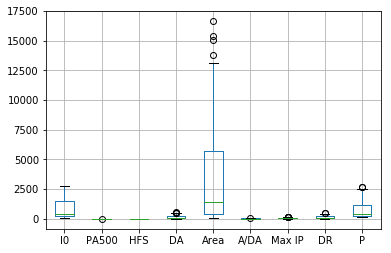

In [55]:
plt.cla()
fig = dataset.boxplot()
# infig.figure

In [56]:
dataset.describe()

,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
count,106.000000,105.000000,102.000000,99.000000,98.000000,101.000000,95.000000,99.000000,105.000000
mean,784.251618,0.117864,0.103145,155.127909,3724.337564,19.786807,52.331548,131.803170,790.771991
std,753.950075,0.064807,0.083831,133.964402,4359.496549,14.846681,36.319006,122.952680,738.620125
min,103.000000,0.012392,-0.066323,19.647670,70.426239,1.595742,7.968783,-9.257696,124.978561
25%,250.000000,0.067195,0.042761,50.845281,367.293098,7.556963,25.878665,36.683776,267.517446
50%,384.936489,0.104720,0.084823,100.788080,1386.534866,15.670203,37.384724,86.576561,445.513299
75%,1487.989626,0.165806,0.160221,224.047865,5672.499772,27.824923,70.876186,198.789606,1197.762150
max,2800.000000,0.317824,0.297404,555.352318,16640.723619,63.651988,160.065460,501.038494,2686.435346


### Interpolate missing values

In [57]:
print('\nBefore interpolate: \n\n', dataset.isnull().sum())
dataset = dataset.interpolate()
print('\nAfter  interpolate: \n\n', dataset.isnull().sum())


Before interpolate: 

 Class      0
I0         0
PA500      1
HFS        4
DA         7
Area       8
A/DA       5
Max IP    11
DR         7
P          1
dtype: int64

After  interpolate: 

 Class     0
I0        0
PA500     0
HFS       0
DA        0
Area      0
A/DA      0
Max IP    0
DR        0
P         0
dtype: int64


### Normalization

In [58]:
from sklearn.preprocessing import StandardScaler
y = dataset[dataset.columns[0]]
# print(y)
X = dataset.drop(dataset.columns[0],axis=1)
# print(X)
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
# print(scaler.mean_)

X = pd.DataFrame(X)
dataset = pd.concat([y, X], axis=1)
dataset.columns = list(dataset_columns)
dataset.head()

,Class,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
0,car,-0.345766,1.056984,-0.871188,0.410123,0.564953,0.625722,0.060448,0.581174,-0.331950
1,car,-0.605358,1.664464,1.917483,-0.342691,-0.226330,0.374037,0.305421,-0.344302,-0.542654
2,car,-0.309671,1.750478,-0.495469,0.661919,1.649591,1.617743,0.513399,0.832590,-0.197483
3,car,-0.538725,1.879501,2.167962,-0.227398,0.255044,1.243925,0.795783,-0.297792,-0.416885
4,car,-0.561605,1.261269,1.667004,-0.316407,-0.198977,0.389458,0.296975,-0.307926,-0.509595


### Training model

In [353]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle

# telescopeuser
total = float(len(range(80,106)))
correct = 0.0

y_true = dataset.iloc[80:106,0]
y_pred = []

clf = svm.SVC(kernel='linear', C=10)
# clf = svm.SVC(kernel='poly', C=10, degree=2)
# clf = RandomForestClassifier(n_estimators=10, max_depth=3)
dataset.sample(frac=1).reset_index(drop=True)
dataset = shuffle(dataset)
X = dataset.iloc[:80,1:].copy().reset_index(drop=True)
y = dataset.iloc[:80,0].copy().reset_index(drop=True)
clf.fit(X, y)
total = float(len(range(80,106)))
correct = 0.0
for i in list(range(80,106)):
    prediction = clf.predict([dataset.iloc[i,1:]])[0]
    print ("Prediction: ",prediction, "Actual: ",dataset.iloc[i,0])
    y_pred.append(prediction)
    if clf.predict([dataset.iloc[i,1:]])[0] == dataset.iloc[i,0]:
        correct += 1.0
print ("\n Accuracy = ",(correct/total)*100.0)
    

Prediction:  con Actual:  con
Prediction:  fad Actual:  fad
Prediction:  adi Actual:  adi
Prediction:  car Actual:  mas
Prediction:  car Actual:  car
Prediction:  adi Actual:  adi
Prediction:  adi Actual:  adi
Prediction:  con Actual:  con
Prediction:  car Actual:  car
Prediction:  adi Actual:  adi
Prediction:  fad Actual:  fad
Prediction:  mas Actual:  mas
Prediction:  adi Actual:  adi
Prediction:  adi Actual:  adi
Prediction:  adi Actual:  adi
Prediction:  fad Actual:  fad
Prediction:  mas Actual:  gla
Prediction:  con Actual:  con
Prediction:  gla Actual:  mas
Prediction:  car Actual:  car
Prediction:  mas Actual:  mas
Prediction:  fad Actual:  gla
Prediction:  car Actual:  car
Prediction:  con Actual:  con
Prediction:  con Actual:  con
Prediction:  gla Actual:  gla

 Accuracy =  84.61538461538461


In [354]:
dataset.Class.unique()

array(['mas', 'gla', 'fad', 'car', 'adi', 'con'], dtype=object)

In [355]:
for name in dataset.Class.unique():
    print (name, dataset.loc[dataset.Class==name,"Class"].count())

mas 18
gla 16
fad 15
car 21
adi 22
con 14


### confusion matrix

In [356]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import itertools

classes = dataset.Class.unique()
cm = confusion_matrix(y_true, y_pred, labels=classes)
cm

array([[0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 2, 1],
       [2, 2, 2, 1, 1, 0],
       [0, 0, 0, 0, 2, 2],
       [1, 0, 0, 3, 1, 2],
       [0, 0, 0, 1, 1, 0]])

In [357]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


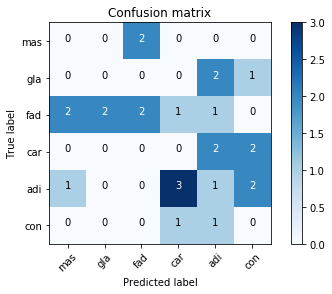

In [358]:
plt.figure()
plot_confusion_matrix(cm,classes=classes)
plt.show()

In [359]:
accuracy = metrics.accuracy_score(y_true, y_pred)
f1 = metrics.f1_score(y_true, y_pred,average=None)
print (accuracy, np.average(f1))

0.115384615385 0.0793650793651


In [360]:
print (metrics.classification_report(y_true, y_pred))

             precision    recall  f1-score   support

        adi       0.14      0.14      0.14         7
        car       0.00      0.00      0.00         4
        con       0.00      0.00      0.00         2
        fad       0.50      0.25      0.33         8
        gla       0.00      0.00      0.00         3
        mas       0.00      0.00      0.00         2

avg / total       0.19      0.12      0.14        26



### learning curve

In [361]:
from sklearn import svm
from sklearn.utils import shuffle
from sklearn.model_selection import learning_curve

# clf = svm.SVC(kernel='linear')
# dataset.sample(frac=1).reset_index(drop=True)
# dataset = shuffle(dataset)
# X = dataset.iloc[:80,1:].copy().reset_index(drop=True)
# y = dataset.iloc[:80,0].copy().reset_index(drop=True)
# clf.fit(X, y).score(X, y)

dataset.sample(frac=1).reset_index(drop=True)
dataset = shuffle(dataset)
X = dataset.iloc[:80,1:].copy().reset_index(drop=True)
y = dataset.iloc[:80,0].copy().reset_index(drop=True)

# train_sizes, train_scores, valid_scores = learning_curve(svm.SVC(kernel='linear'), X, y, train_sizes=list(np.arange(10,60,10)), cv=5)
train_sizes, train_scores, valid_scores = learning_curve(clf, X, y, train_sizes=list(np.arange(10,60,10)), cv=5)


[ 1.          0.83        0.84666667  0.85        0.86      ] [ 0.40797009  0.5408547   0.53946581  0.55418803  0.65606838]


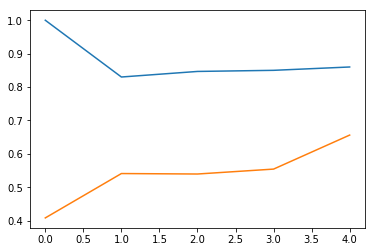

In [362]:
train = np.mean(train_scores,axis=1)
test = np.mean(valid_scores,axis=1)
print (train,test)
plt.clf()
plt.plot(train)
plt.plot(test)
plt.show()